In [1]:
# Import packages:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

# Set default plotting parameters:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams[ 'font.sans-serif'  ] = 'Calibri'
mpl.rcParams[ 'font.size'        ] = 10
mpl.rcParams[ 'mathtext.default' ] = 'regular'          
mpl.rcParams[ 'xtick.direction'  ] = 'out'
mpl.rcParams[ 'ytick.direction'  ] = 'out'       
mpl.rcParams[ 'lines.linewidth'  ] = 1.0     


dt = 1./24. # define sampling frequency in days

# Specify dataset name:
name = str(int(np.loadtxt('Data/name.txt')))

# Import datasets created by titree2.py script:
tide  = np.loadtxt('Data/tide.dat', dtype=str)
p     = np.loadtxt('Data/p.dat') 
NP    = len(p)
omega = np.loadtxt('Data/omega.dat')
t1  = np.loadtxt('Data/t1.dat')+693960.-365. # fudge factor of 365 currently applied
w1  = np.loadtxt('Data/w1.dat')         
T1  = np.loadtxt('Data/t1b.dat')          
t2  = np.loadtxt('Data/t2.dat')  
T2  = np.loadtxt('Data/t2b.dat')  
h2  = np.loadtxt('Data/h2.dat')  
w2  = np.loadtxt('Data/w2.dat')  
bp  = np.loadtxt('Data/bp.dat')  
t   = np.loadtxt('Data/t.dat')  
x   = np.loadtxt('Data/x.vec')  
y   = np.loadtxt('Data/y.vec')  
dx  = np.loadtxt('Data/dx.dat')  
n   = len(dx)
dy  = np.loadtxt('Data/dy.dat')  
nn  = np.loadtxt('Data/nn.dat')   
lag = np.loadtxt('Data/lag.dat')  
nm  = len(lag)
v = np.loadtxt('Data/v.mat')  
X = np.loadtxt('Data/X.mat')  
Z = np.loadtxt('Data/Z.mat')  
c  = np.loadtxt('Data/c.dat')  
nc = len(c)

# Import dataset created by titree3.py script:
ca = np.loadtxt('Data/ca.dat')  

# Resample vented groundwater pressure data to hourly frequency:
ta = np.arange(t1[0], t1[-1]+dt, dt)
ya = np.interp(ta, t1, w1)
np.savetxt('Data/ta.dat', ta)
np.savetxt('Data/ya.dat', ya)

# Detrend vented groundwater pressure data:
yb = ya-ca[0]-ta*ca[1]
n = len(yb)
np.savetxt('Data/yb.dat', yb)

# Define the size of segments for later separation of pressure data: (?)
nk = 7*24 # segments are each 7 days in length
kb = np.arange(1, n, nk, dtype=int)
nb = len(kb)-1
np.savetxt('Data/kb.dat', kb)

# Select S1 and S2 Earth tide components:
gb = [2, 8]

# Formulate complex vector cb:
cb = np.empty([nb, 2], dtype=complex) 
for k in range(nb):
    j = nk*k+np.arange(1, nk+1)
    tb = ta[j]
    v = np.zeros([nk, 2], dtype=np.complex)
    for i in range(2):
        tau = omega[gb[i]]*tb 
        v[:,i] = [a+1j*b for a,b in zip(np.cos(tau), np.sin(tau))] 
    cb[k,:] = np.linalg.lstsq(v, yb[j], rcond=None)[0]
np.savetxt('Data/cb.dat', cb)

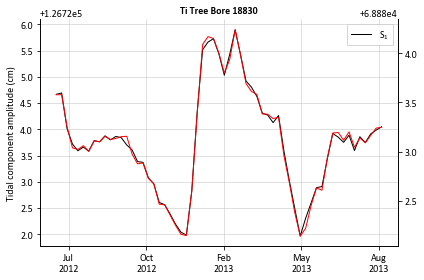

In [3]:
# Plot temporal variation of tidal components:
%matplotlib inline
f,s = plt.subplots()
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
np.savetxt('Data/test.dat', ta[kb[range(nb)]])
s.plot(np.array(ta[kb[range(nb)]]), abs(cb[:,0]), 'k-', label=tide[gb[0]])
s2 = s.twinx()
s2.plot(np.array(ta[kb[range(nb)]]), abs(cb[:,1]), 'r-', label=tide[gb[1]])
s.set_ylabel('Tidal component amplitude (cm)')
s.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b\n%Y'))
#s.set_xlim(datetime(2012, 6, 15), datetime(2013, 9, 10))
s.legend(fancybox=False) 
for S in [s, s2]:
    for i in ['top']:
        S.spines[i].set_visible(False)
s.grid(which='major', axis='both', c=(194./255., 194./255., 194./255.), ls='-', lw=0.5)                            
plt.tight_layout()